# D-Wave Spin Configuration Domain Analysis
This notebook demonstrates how to analyze spin configurations sampled from D-Wave to extract domain sizes and compute the distribution $P_A$ vs $A$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Flood fill with periodic boundary conditions
def floodFill(image, x, y, newChar, oldChar=None):
    if oldChar is None:
        oldChar = image[y][x]
    if oldChar == newChar or image[y][x] != oldChar:
        return
    stack = [(x, y)]
    while stack:
        x, y = stack.pop()
        if image[y][x] == oldChar:
            image[y][x] = newChar
            stack.append(((x + 1) % WIDTH, y))
            stack.append(((x - 1) % WIDTH, y))
            stack.append((x, (y + 1) % HEIGHT))
            stack.append((x, (y - 1) % HEIGHT))

In [3]:
def loops(image):
    domain_sizes = []
    domain_nr = 0
    oldChar = 0
    for y, row in enumerate(image):
        for x, val in enumerate(row):
            if val == oldChar:
                domain_nr += 1
                floodFill(image, x, y, domain_nr, oldChar=oldChar)
                domain_sizes.append(np.sum(image == domain_nr))
    return np.array(domain_sizes).astype(int)

In [4]:
# Load configuration
config = np.load("example_configuration.npy")
HEIGHT, WIDTH = config.shape

In [13]:
# Analyze configuration
def analyze_spin_configuration(spin_config):
    global WIDTH, HEIGHT
    HEIGHT, WIDTH = spin_config.shape
    domain_sizes = []
    spin_config = (-(spin_config-1)/2).astype(int) - 1
    domain_sizes.extend(loops(spin_config))
    print(domain_sizes)
    area_counts = Counter(domain_sizes)
    A_vals = np.array(sorted(area_counts))
    P_A_vals = np.array([area_counts[a] / (HEIGHT * WIDTH) for a in A_vals])
    return A_vals, P_A_vals

A_vals, P_A_vals = analyze_spin_configuration(config)

[np.int64(19), np.int64(233), np.int64(11), np.int64(137), np.int64(7), np.int64(317), np.int64(1), np.int64(1), np.int64(13), np.int64(1), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(9)]


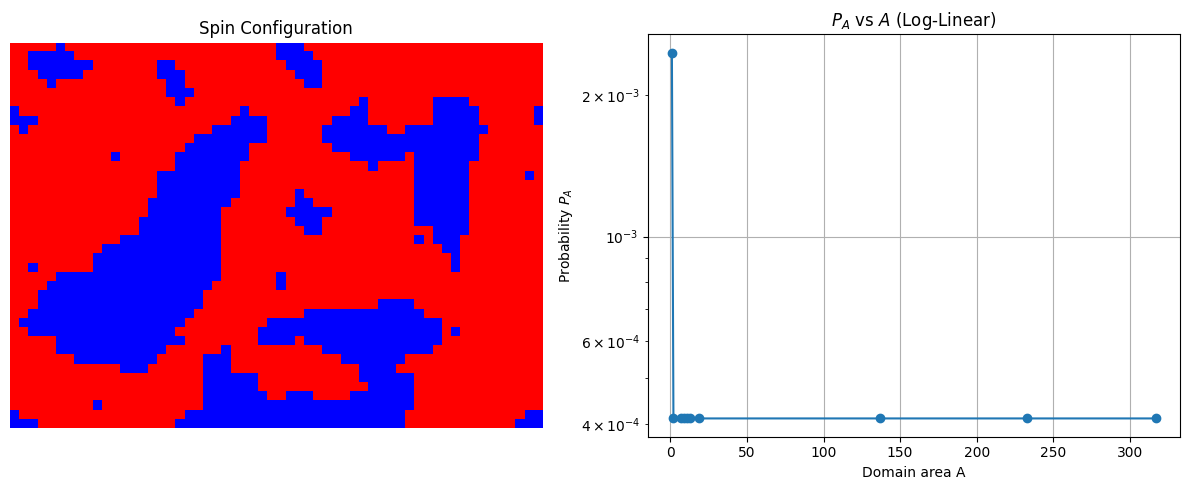

In [14]:
# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].imshow(config, cmap='bwr', interpolation='nearest')
axs[0].set_title("Spin Configuration")
axs[0].axis('off')
axs[1].semilogy(A_vals, P_A_vals, 'o-')
axs[1].set_xlabel("Domain area A")
axs[1].set_ylabel("Probability $P_A$")
axs[1].set_title("$P_A$ vs $A$ (Log-Linear)")
axs[1].grid(True)
plt.tight_layout()
plt.show()